In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from  matplotlib  import pyplot as plt
import os
from sklearn.model_selection import cross_val_score

In [2]:
input_loc="C:/Users/AVIRAL/OneDrive/Desktop/machine_learning/Data Analysis/datasets/"
output_loc="C:/Users/AVIRAL/OneDrive/Desktop/machine_learning/Data Analysis/datasets/Datasets2/"


In [3]:
file_list=os.listdir(input_loc)
file_list

['classifytwo.csv', 'classifywin.csv', 'Datasets2']

In [4]:
finaldf=pd.DataFrame()
for files in file_list:
    if files.endswith(".csv"):
        df=pd.read_csv(input_loc+files)
        finaldf=finaldf.append(df)
        
        
finaldf.to_csv(output_loc+"final.csv") 

C:\Users\AVIRAL\AppData\Local\Temp\ipykernel_2748\693849281.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finaldf=finaldf.append(df)
C:\Users\AVIRAL\AppData\Local\Temp\ipykernel_2748\693849281.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finaldf=finaldf.append(df)


In [5]:
#PREPROCESSING THE DATASETS

In [6]:
data=pd.read_csv("C:/Users/AVIRAL/OneDrive/Desktop/machine_learning/Data Analysis/datasets/Datasets2/final.csv")

In [7]:
data.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
# Checking the null values 
data.isnull().sum()

Unnamed: 0             0
Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
# Filling the numerical values using the mean
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [10]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [11]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [12]:
# Filling the categorical data with the -> mode:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Status']=data['Loan_Status'].fillna(data['Loan_Status'].mode()[0])

In [13]:
# Exploratory Data Analysis 

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

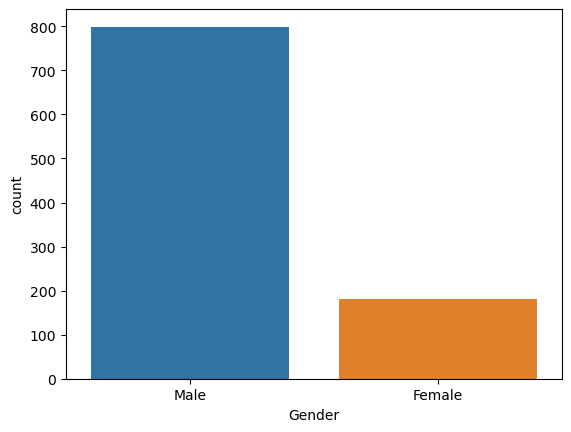

In [14]:
sns.countplot(data['Gender'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

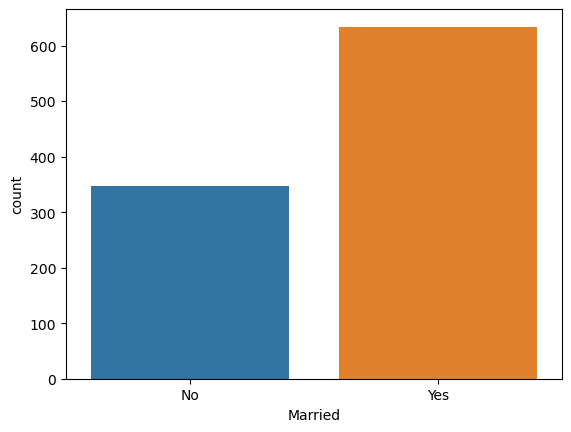

In [15]:
sns.countplot(data['Married'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

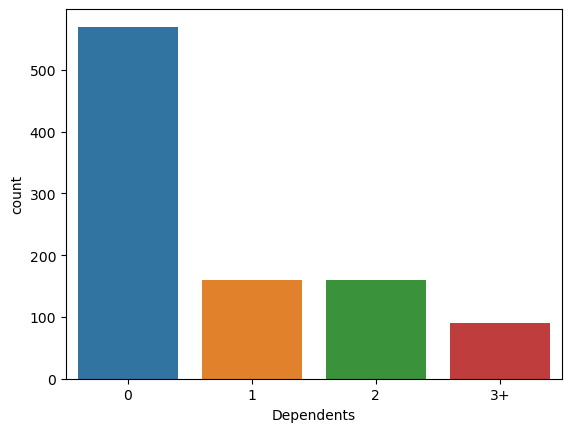

In [16]:
sns.countplot(data['Dependents'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

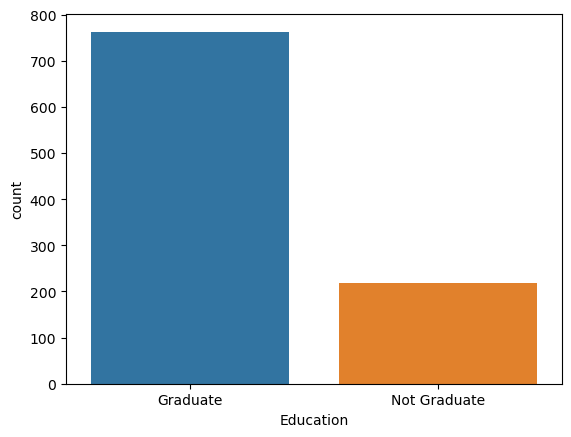

In [17]:
sns.countplot(data['Education'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

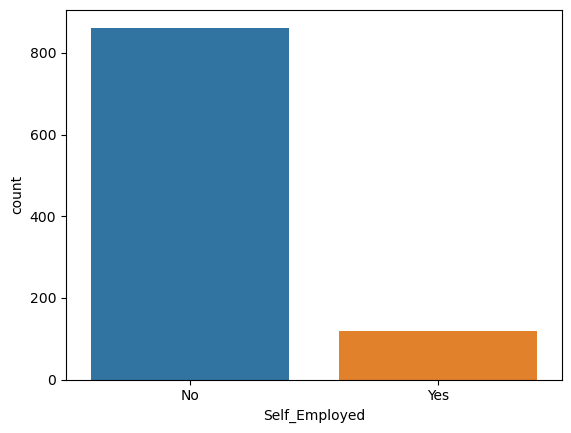

In [18]:
sns.countplot(data['Self_Employed'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

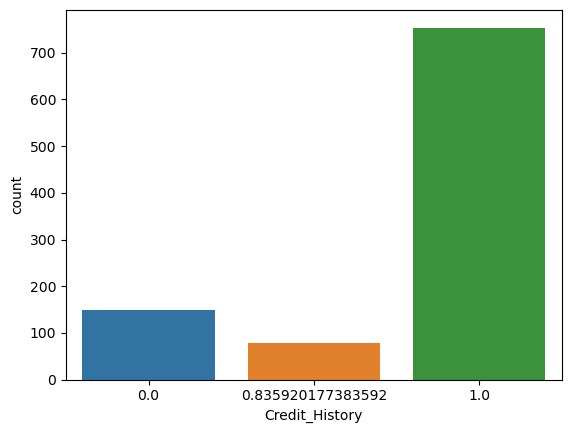

In [19]:
sns.countplot(data['Credit_History'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

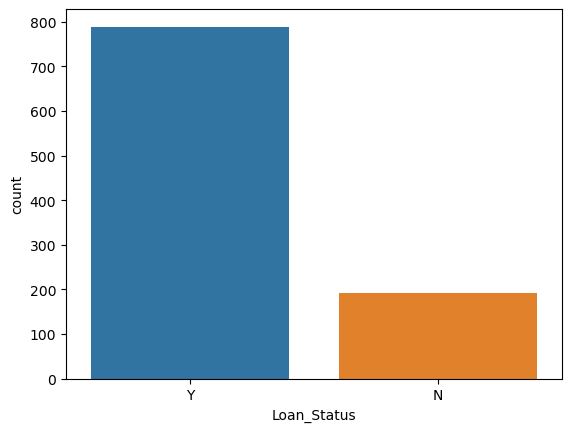

In [20]:
sns.countplot(data['Loan_Status'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

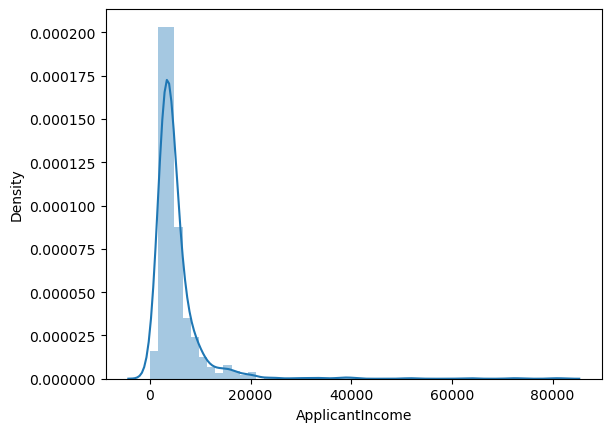

In [21]:
# Numerical Attributes Visulization :
sns.distplot(data['ApplicantIncome'])

In [22]:
data['ApplicantIncome']=np.log(data['ApplicantIncome'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


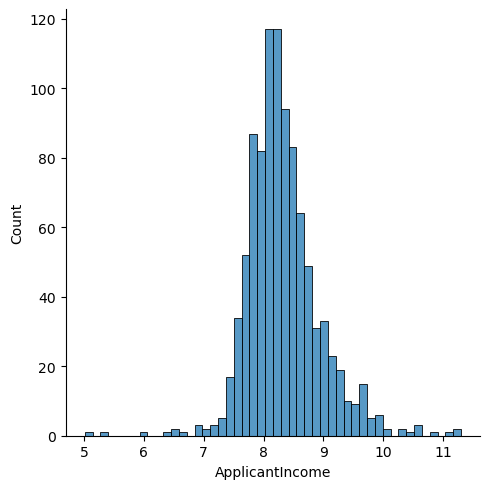

In [23]:
sns.displot(data["ApplicantIncome"])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

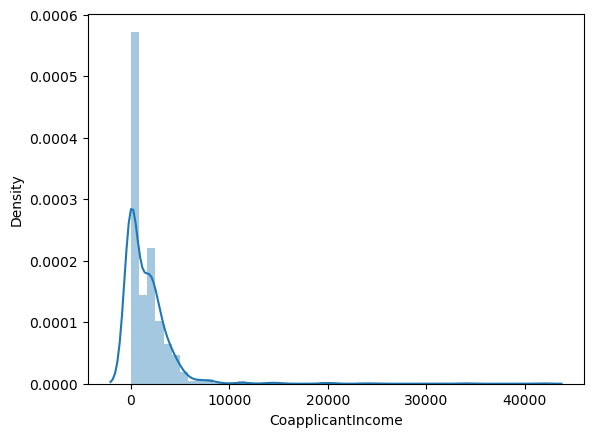

In [24]:
sns.distplot(data['CoapplicantIncome'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

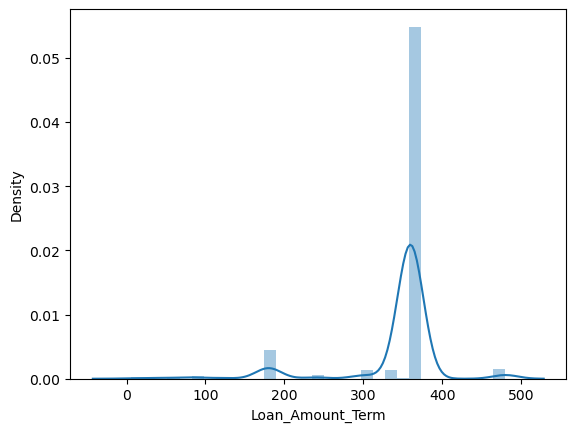

In [25]:
sns.distplot(data['Loan_Amount_Term'])

In [26]:
data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

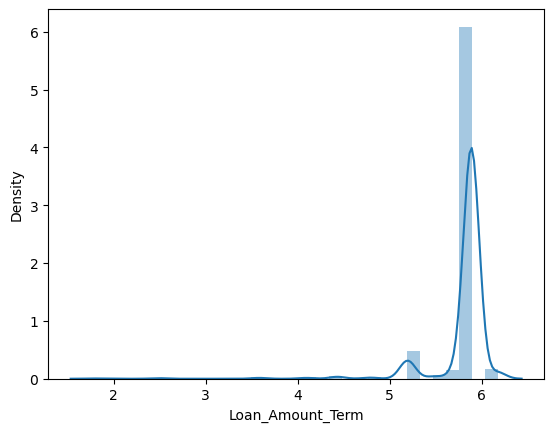

In [27]:
sns.distplot(data['Loan_Amount_Term'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

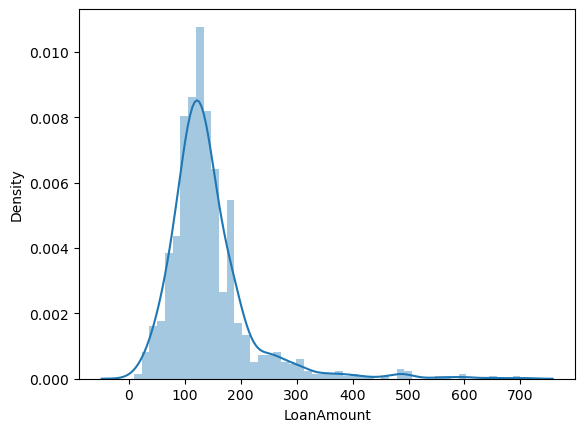

In [28]:
sns.distplot(data['LoanAmount'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

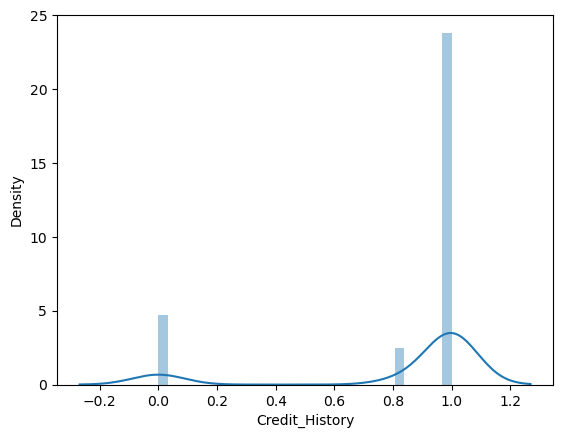

In [29]:
sns.distplot(data['Credit_History'])

C:\Users\AVIRAL\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\AVIRAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

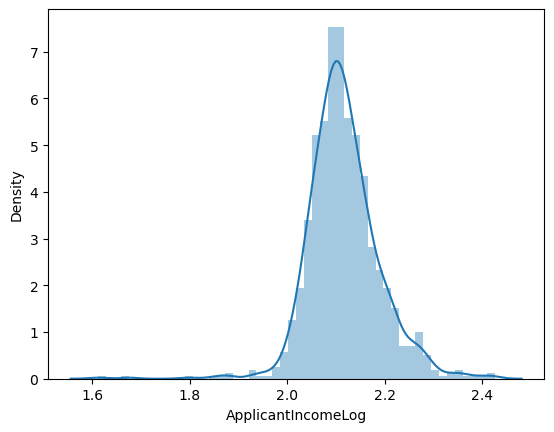

In [30]:
# Apply Log Transformation to the attribute :
data['ApplicantIncomeLog']=np.log(data['ApplicantIncome'])
sns.distplot(data['ApplicantIncomeLog'])

<AxesSubplot:>

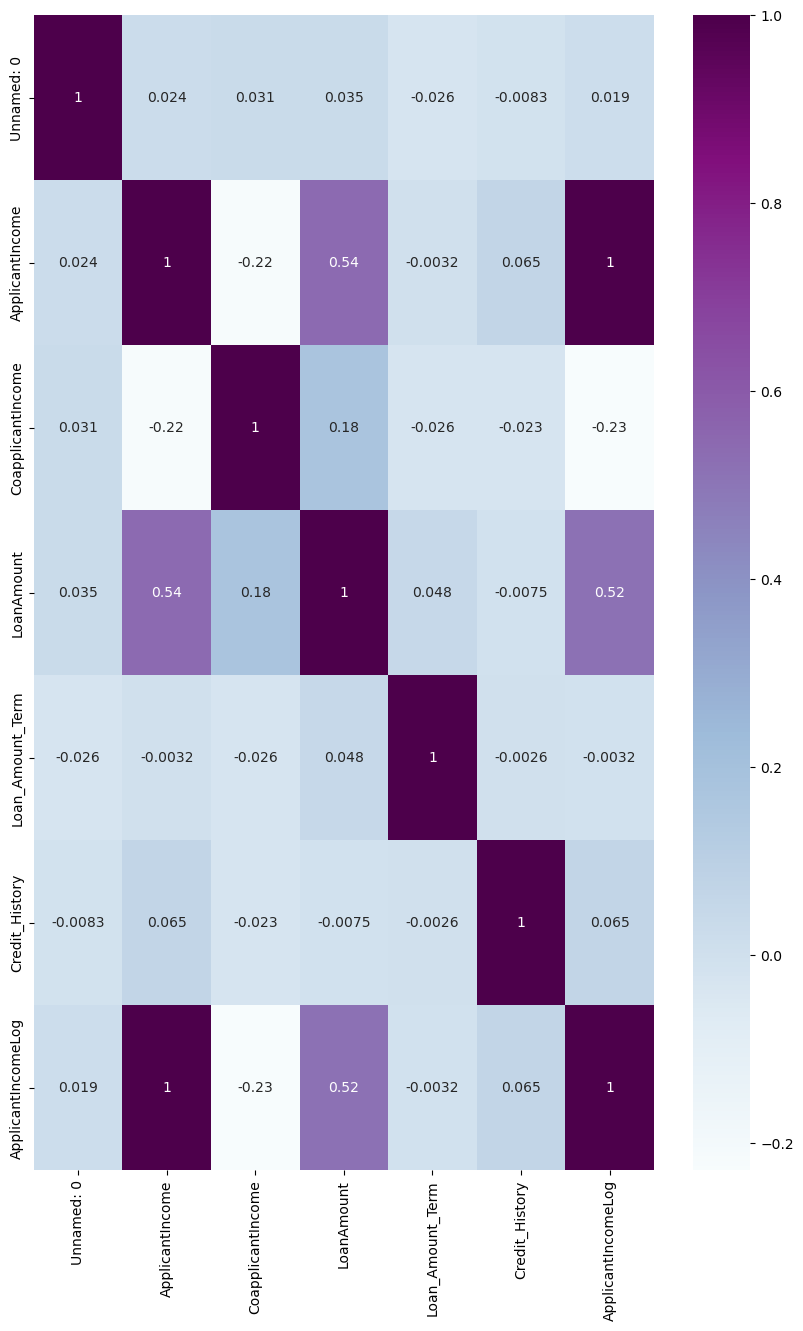

In [31]:
# Correlation Matrix :
corr=data.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [32]:
# Drop Unnecessary Column
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID','CoapplicantIncome']

data=data.drop(columns=cols,axis=1)

In [33]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog
0,0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333
1,1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810
2,2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237
3,3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368
4,4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267


In [34]:
# Label Encoding :
from sklearn.preprocessing import LabelEncoder
cols=['Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents','Gender']

l1=LabelEncoder()
for col in cols:
    data[col]=l1.fit_transform(data[col])

In [35]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog
0,0,1,0,0,0,0,1.0,2,1,2.160333
1,1,1,1,1,0,0,1.0,0,0,2.131810
2,2,1,1,0,0,1,1.0,2,1,2.080237
3,3,1,1,0,1,0,1.0,2,1,2.061368
4,4,1,0,0,0,0,1.0,2,1,2.163267


In [36]:
# Train -Test Split :
y=data['Loan_Status']
X=data.drop(columns='Loan_Status',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.43,random_state=42)

In [37]:
X_train.fillna(method="bfill",inplace=True)

In [38]:
X_train.isnull().sum()

Unnamed: 0            0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
ApplicantIncomeLog    0
dtype: int64

In [39]:
y_train

481    1
602    1
784    1
599    1
176    1
      ..
106    1
270    1
860    1
435    1
102    1
Name: Loan_Status, Length: 559, dtype: int32

In [47]:
def classify(model,X,Y):
    model.fit(X_train,y_train)
    print("Accuracy score is ",model.score(X_test,y_test)*100)
    score=cross_val_score(model,X,y,cv=5)
    print("Cross_validation ",np.mean(score)*100)
    

In [41]:
# Model Training 
# Classify the function and classifiy the model 
from sklearn.linear_model import LogisticRegression  

In [42]:
model=LogisticRegression()


In [48]:
classify(model,X,y)

Accuracy score is  82.22748815165876
Cross_validation  nan


C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Tr

In [49]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
classify(model1,X,y)

Accuracy score is  72.03791469194313
Cross_validation  nan


C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 165, in fit
    X, y = self._validate_data(
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\base.py", 

In [51]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model2=RandomForestClassifier()
classify(model2,X,y)

Accuracy score is  81.27962085308057
Cross_validation  nan


C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\AVIRAL\anaconda3\lib\s

In [52]:
# HYPERPARAMETER TUNING:
model3=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

classify(model3,X,y)


Accuracy score is  78.90995260663507
Cross_validation  nan


C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\AVIRAL\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\AVIRAL\anaconda3\lib\s

In [53]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 24,  67],
       [  8, 323]], dtype=int64)

<AxesSubplot:>

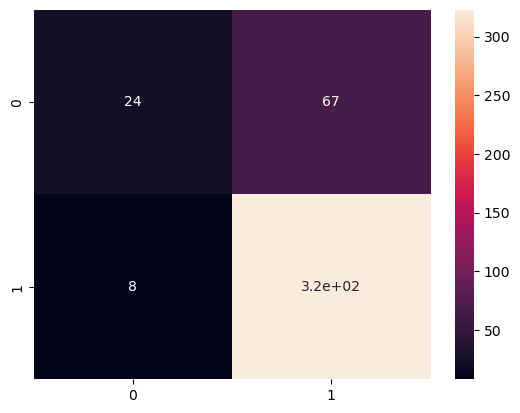

In [54]:
sns.heatmap(cm,annot=True)